In [31]:
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
data=pd.read_csv('Real_estate_valuation.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Removing the unnecessary column

In [33]:
data.drop('No',axis=1,inplace=True)
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Data Analysis

In [34]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Renaming columns

In [35]:
data.columns=['date','age','distance','store_number','latitude','longitude','price']
data.head()

,date,age,distance,store_number,latitude,longitude,price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# 2a K Nearest Neighbor

In [36]:
X=data.drop('price',axis=1)
y=data['price']
X = X.values
y = y.values

In [37]:
# intermediate/test split (gives us test set)
X_intermediate, X_test, y_intermediate, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
#For validation train/validation split (gives us train and validation sets)
X_train, X_validation, y_train, y_validation = train_test_split(X_intermediate, y_intermediate, shuffle=False,test_size=0.25, random_state=1)

In [38]:
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(n_splits=5, shuffle=True, random_state=42)
coefs=[]
k_range=range(1,50)
train_errors = []
validation_errors = []
test_errors = []
rmse_val={}
optK=[]
for train_index, val_index in kf.split(X_intermediate, y_intermediate):
        
        #print(train_index, val_index)
        # split data
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        #print(X_train, y_train)
        
        m={}
        for i in k_range:
            #create a new KNN model
            knn_cv = neighbors.KNeighborsRegressor(n_neighbors=i)
            #train model with cv of 5 
            cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
            m[i]=np.mean(cv_scores)
        k=max(m, key=m.get)
        optK.append(k)
        # instantiate model
        knn = neighbors.KNeighborsRegressor(n_neighbors=k)
        
        #calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, knn)
        train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, knn)
        
        # append to appropriate list
        train_errors.append(math.sqrt(train_error))
        validation_errors.append(math.sqrt(val_error))
        
for train_index, test_index in kf.split(X, y):
        
        # split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        m={}
        for i in k_range:
            #create a new KNN model
            knn_cv = neighbors.KNeighborsRegressor(n_neighbors=i)
            #train model with cv of 5 
            cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
            m[i]=np.mean(cv_scores)
        k=max(m, key=m.get)

        # instantiate model
        knn = neighbors.KNeighborsRegressor(n_neighbors=k)
        
        #calculate errors
        train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, knn)
        
        # append to appropriate list
        test_errors.append(math.sqrt(test_error))
        
c=1
for i,j,k,l in zip(train_errors, validation_errors, test_errors, optK):
    print("***********************************************")
    print("The train error in sample",c,'---->',i)
    print("The validation error in sample",c,'---->',j)
    print("The test error in sample",c,'---->',k)
    print("The optimal value of K in sample",c,'---->',l)
    c+=1


***********************************************
The train error in sample 1 ----> 6.7745101294475525
The validation error in sample 1 ----> 7.3000262425393005
The test error in sample 1 ----> 7.379590219465369
The optimal value of K in sample 1 ----> 3
***********************************************
The train error in sample 2 ----> 6.98363957698432
The validation error in sample 2 ----> 7.665543395973671
The test error in sample 2 ----> 7.8808029680792515
The optimal value of K in sample 2 ----> 3
***********************************************
The train error in sample 3 ----> 6.9859647869373775
The validation error in sample 3 ----> 9.559007983085362
The test error in sample 3 ----> 7.1609418972242525
The optimal value of K in sample 3 ----> 4
***********************************************
The train error in sample 4 ----> 7.179504619407008
The validation error in sample 4 ----> 9.66587848550517
The test error in sample 4 ----> 8.196254697021601
The optimal value of K in sample 4 -

<b>Train, test errors are lesser than Ridge and Lasso.</b>

# 2b  Normalising values of X and y

In [39]:
X=data.drop('price',axis=1)
y=data['price']
from sklearn.preprocessing import MinMaxScaler
#standardized_X = preprocessing.scale(X)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
#rescaledy = scaler.fit_transform(y)

In [40]:
# intermediate/test split (gives us test set)
X_intermediate, X_test, y_intermediate, y_test = train_test_split(rescaledX, y, test_size=0.30, random_state=1)
#For validation train/validation split (gives us train and validation sets)
X_train, X_validation, y_train, y_validation = train_test_split(X_intermediate, y_intermediate, shuffle=False,test_size=0.25, random_state=1)

In [41]:
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(n_splits=5, shuffle=True, random_state=42)
coefs=[]
k_range=range(1,50)
train_errors = []
validation_errors = []
test_errors = []
rmse_val={}
optK=[]
for train_index, val_index in kf.split(X_intermediate, y_intermediate):
        
        # split data
        X_train, X_val = rescaledX[train_index], rescaledX[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        m={}
        for i in k_range:
            #create a new KNN model
            knn_cv = neighbors.KNeighborsRegressor(n_neighbors=i)
            #train model with cv of 5 
            cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
            m[i]=np.mean(cv_scores)
        k=max(m, key=m.get)
        optK.append(k)
        # instantiate model
        knn = neighbors.KNeighborsRegressor(n_neighbors=k)
        
        #calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, knn)
        train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, knn)
        
        # append to appropriate list
        train_errors.append(math.sqrt(train_error))
        validation_errors.append(math.sqrt(val_error))
        
for train_index, test_index in kf.split(rescaledX, y):
        
        # split data
        X_train, X_test = rescaledX[train_index], rescaledX[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        m={}
        for i in k_range:
            #create a new KNN model
            knn_cv = neighbors.KNeighborsRegressor(n_neighbors=i)
            #train model with cv of 5 
            cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
            m[i]=np.mean(cv_scores)
        k=max(m, key=m.get)

        # instantiate model
        knn = neighbors.KNeighborsRegressor(n_neighbors=k)
        
        #calculate errors
        train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, knn)
        
        # append to appropriate list
        test_errors.append(math.sqrt(test_error))
        
c=1
for i,j,k,l in zip(train_errors, validation_errors, test_errors, optK):
    print("***********************************************")
    print("The train error in sample",c,'---->',i)
    print("The validation error in sample",c,'---->',j)
    print("The test error in sample",c,'---->',k)
    print("The optimal value of K in sample",c,'---->',l)
    c+=1


***********************************************
The train error in sample 1 ----> 7.897948784184092
The validation error in sample 1 ----> 8.23464203848083
The test error in sample 1 ----> 6.803293491709537
The optimal value of K in sample 1 ----> 6
***********************************************
The train error in sample 2 ----> 8.428511317563917
The validation error in sample 2 ----> 7.714927424960898
The test error in sample 2 ----> 8.389866497600154
The optimal value of K in sample 2 ----> 10
***********************************************
The train error in sample 3 ----> 8.901173175191632
The validation error in sample 3 ----> 7.736832311660245
The test error in sample 3 ----> 8.246848384876039
The optimal value of K in sample 3 ----> 16
***********************************************
The train error in sample 4 ----> 7.802506330956435
The validation error in sample 4 ----> 8.868346045140248
The test error in sample 4 ----> 8.283756496104107
The optimal value of K in sample 4 ---

# 2 c Test-train curve

In [42]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, shuffle=False,test_size=0.20, random_state=1)

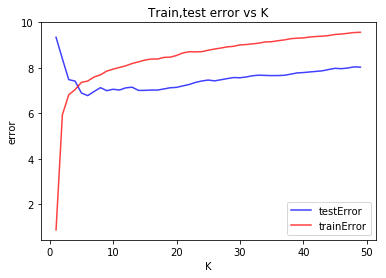

In [43]:
testError=[]
trainError=[]
test={}
K = range(1,50)
for a in K:
    knn = neighbors.KNeighborsRegressor(n_neighbors=a)
    knn.fit(X_train, y_train)
    y_predict_test = knn.predict(X_test)
    mse_test = mean_squared_error(y_test, y_predict_test)
    rmse_test = np.sqrt(mse_test)
    y_predict_train = knn.predict(X_train)
    mse_train = mean_squared_error(y_train, y_predict_train)
    rmse_train = np.sqrt(mse_train)
    trainError.append(rmse_train)
    testError.append(rmse_test)
plt.plot(K, testError, alpha=0.75, color='b',label='testError')
plt.plot(K, trainError, alpha=0.75, color='r', label='trainError')
plt.xlabel('K')
plt.ylabel('error')
plt.legend()
plt.title('Train,test error vs K')
plt.show()

<b>The curve is highly biased since training and testing errors converge and are high.
As the value of k increases, train error increases and test error decreases.</b>

# 2 c

In [58]:
import operator
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict_test = knn.predict(X_test)
y_test1=y_test.to_dict()
#print(y_test1)
k=0
sq_error={}
for i,j in y_test1.items():
    sq_error[i]=(pow(j-y_predict_test[k],2))
    print("For home--->",i, "predicted price--->",y_predict_test[k],"actual price--->",j,"Square Error--->", pow(j-y_predict_test[k],2))
    k+=1
print("Home with maximum RMSE--->",max(sq_error.items(), key=operator.itemgetter(1))[0])

For home---> 331 predicted price---> 16.633333333333336 actual price---> 15.6 Square Error---> 1.0677777777777848
For home---> 332 predicted price---> 38.233333333333334 actual price---> 39.6 Square Error---> 1.867777777777779
For home---> 333 predicted price---> 43.26666666666667 actual price---> 38.4 Square Error---> 23.68444444444452
For home---> 334 predicted price---> 38.666666666666664 actual price---> 22.8 Square Error---> 251.75111111111102
For home---> 335 predicted price---> 40.0 actual price---> 36.5 Square Error---> 12.25
For home---> 336 predicted price---> 35.0 actual price---> 35.6 Square Error---> 0.3600000000000017
For home---> 337 predicted price---> 36.8 actual price---> 30.9 Square Error---> 34.80999999999998
For home---> 338 predicted price---> 41.8 actual price---> 36.3 Square Error---> 30.25
For home---> 339 predicted price---> 62.79999999999999 actual price---> 50.4 Square Error---> 153.7599999999998
For home---> 340 predicted price---> 37.4 actual price---> 42.

<b>Maximum RMSE is in House number 361.
The predicted price is 35.46666666666667 and actual price is 63.3.</b>

In [59]:
data.corr(method ='kendall') 

,date,age,distance,store_number,latitude,longitude,price
date,1.000000,0.025150,0.065571,0.002541,0.018027,-0.010357,0.047391
age,0.025150,1.000000,0.083371,0.001191,0.024074,-0.071680,-0.188266
distance,0.065571,0.083371,1.000000,-0.526361,-0.287101,-0.343743,-0.581748
store_number,0.002541,0.001191,-0.526361,1.000000,0.323886,0.300292,0.463996
latitude,0.018027,0.024074,-0.287101,0.323886,1.000000,0.181723,0.409268
longitude,-0.010357,-0.071680,-0.343743,0.300292,0.181723,1.000000,0.323252
price,0.047391,-0.188266,-0.581748,0.463996,0.409268,0.323252,1.000000


<b>The corelation between price and store_number is the maximum.
In this particular house 361, the store_number value is 10 which is the highest amongst all and therefore leads to high price of the house. </b>